## Data Analysis

1. On average Urban areas have more drivers and more total rides per city, but, the average fare tends to be lower
2. Urban areas employ a disproportianate number of drivers (80%) to the total fares that they generate (63%)
3. Conversely, Rural areas employ the lowest total % of drivers (3%) while they contribute 7% of the total fares.

In [388]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load - I moved the files into the same directory as my .ipynb file
city_data_to_load = "city_data.csv"
ride_data_to_load = "ride_data.csv"

# Read the City and Ride Data
city_data_raw = pd.read_csv(city_data_to_load)
ride_data_raw = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
ride_merged = pd.merge(city_data_raw, ride_data_raw, on="city", how="outer")
ride_merged = ride_merged.set_index("type")


# Display the data table for preview
ride_merged.head()

,city,driver_count,date,fare,ride_id
type,,,,,
Urban,Richardfort,38,2018-02-24 08:40:38,13.93,5628545007794
Urban,Richardfort,38,2018-02-13 12:46:07,14.00,910050116494
Urban,Richardfort,38,2018-02-16 13:52:19,17.92,820639054416
Urban,Richardfort,38,2018-02-01 20:18:28,10.26,9554935945413
Urban,Richardfort,38,2018-04-17 02:26:37,23.00,720020655850


In [389]:
# Create data frames for each of the city types
urban_df = ride_merged.loc["Urban"]
suburban_df = ride_merged.loc["Suburban"]
rural_df = ride_merged.loc["Rural"]

# Create groupby objects using those data frames
urban_groupby_city = urban_df.groupby(['city'])
suburban_groupby_city = suburban_df.groupby(['city'])
rural_groupby_city = rural_df.groupby(['city'])

# Calculate the AVG fare by city for thos groupby objects
urban_avg_fare = urban_groupby_city['fare'].mean()
suburban_avg_fare = suburban_groupby_city['fare'].mean()
rural_avg_fare = rural_groupby_city['fare'].mean()

# Calculate the total rides per city using those groupby objects
urban_rides = urban_groupby_city['ride_id'].count()
suburban_rides = suburban_groupby_city['ride_id'].count()
rural_rides = rural_groupby_city['ride_id'].count()

# Calculate the number of drivers in each city and store that to 3 variables
urban_drivers = (urban_groupby_city['driver_count'].sum())/(urban_groupby_city['driver_count'].count())
suburban_drivers = (suburban_groupby_city['driver_count'].sum())/(suburban_groupby_city['driver_count'].count())
rural_drivers = (rural_groupby_city['driver_count'].sum())/(rural_groupby_city['driver_count'].count())


## Bubble Plot of Ride Sharing Data

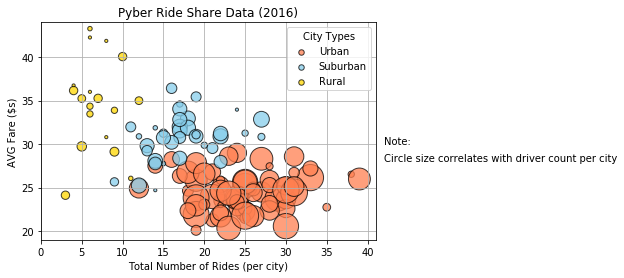

In [390]:
# Obtain the x and y coordinates for each of the three city types
urban = plt.scatter(urban_rides, urban_avg_fare, marker="o", facecolors="coral", edgecolors="black",
             s=urban_drivers*10, alpha=.75)

suburban = plt.scatter(suburban_rides, suburban_avg_fare, marker="o", facecolors="skyblue", edgecolors="black",
              s=suburban_drivers*10, alpha=.75)

rural = plt.scatter(rural_rides, rural_avg_fare, marker="o", facecolors="gold", edgecolors="black",
              s=rural_drivers*10, alpha=.75)


# Incorporate the other graph properties
plt.xlim(0, 41)
plt.ylim(19, 44)
plt.title("Pyber Ride Share Data (2016)")
plt.xlabel("Total Number of Rides (per city)")
plt.ylabel("AVG Fare ($s)")
plt.grid(True)
fig.tight_layout()

# Create a legend
legend = plt.legend(title= "City Types", labels=['Urban', 'Suburban', 'Rural'], loc="best")
legend.legendHandles[0]._sizes = [30]
legend.legendHandles[1]._sizes = [30]
legend.legendHandles[2]._sizes = [30]

# Incorporate a text label regarding circle size
textstr = "Note:" 
textstr2 = "Circle size correlates with driver count per city"

plt.text(42, 30, textstr, fontsize=10)
plt.text(42, 28, textstr2, fontsize=10)


# Save Figure
plt.savefig("PyberScatter.png", bbox_inches='tight')

In [391]:
# Show plot
plt.show()

## Total Fares by City Type

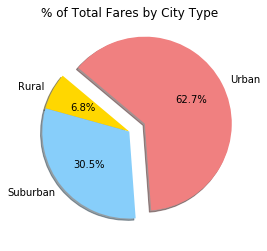

In [392]:
# Calculate Type Percents
type_pie = ride_merged.groupby(['type'])
groupby_type_pie = type_pie['fare'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.2)
plt.title("% of Total Fares by City Type")
plt.pie(groupby_type_pie, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=140)
# Save File
plt.savefig("PyberFareByCity.png", bbox_inches='tight')

In [393]:
# Show Figure
plt.show()

## Total Rides by City Type

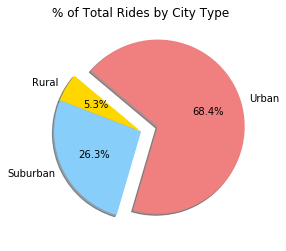

In [394]:
# Calculate Ride Percents
rides_pie = ride_merged.groupby(['type'])
groupby_rides_pie = rides_pie['ride_id'].count()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.2)
plt.title("% of Total Rides by City Type")
plt.pie(groupby_rides_pie, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=140)
# Save File
plt.savefig("PyberRidesByCity.png", bbox_inches='tight')

In [395]:
# Show Figure
plt.show()

## Total Drivers by City Type

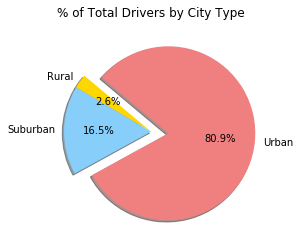

In [396]:
# Calculate Ride Percents
drivers_pie = city_data_raw.groupby(['type'])
groupby_drivers_pie = drivers_pie['driver_count'].sum()

# Build Pie Chart
labels = ["Rural", "Suburban", "Urban"]
colors = ["gold", "lightskyblue", "lightcoral"]
explode = (0, 0, 0.2)
plt.title("% of Total Drivers by City Type")
plt.pie(groupby_drivers_pie, explode=explode, labels=labels, colors=colors,
            autopct="%1.1f%%", shadow=True, startangle=140)
# Save File
plt.savefig("PyberDriversByCity.png", bbox_inches='tight')

In [397]:
# Show Figure
plt.show()